In [1]:
import torch
import torch.nn as nn
import torch.optim as optim


In [2]:
# Coefficients of the cubic equation: ax^3 + bx^2 + cx + d = 0
a = 1.0
b = -3.0
c = 2.0
d = -1.0


In [3]:
x = torch.randn(1, requires_grad=True)


In [5]:
relu = nn.ReLU()

def cubic_loss(x):
    y = a*x**3 + b*x**2 + c*x + d
    return relu(y**2)


In [6]:
optimizer = optim.SGD([x], lr=0.01)


In [7]:
for epoch in range(1000):
    optimizer.zero_grad()
    loss = cubic_loss(x)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, x = {x.item():.4f}, loss = {loss.item():.6f}")


Epoch 0, x = 1.4227, loss = 1.829063
Epoch 100, x = 0.4485, loss = 0.379878
Epoch 200, x = 0.4230, loss = 0.378348
Epoch 300, x = 0.4227, loss = 0.378348
Epoch 400, x = 0.4227, loss = 0.378348
Epoch 500, x = 0.4227, loss = 0.378348
Epoch 600, x = 0.4227, loss = 0.378348
Epoch 700, x = 0.4227, loss = 0.378348
Epoch 800, x = 0.4227, loss = 0.378348
Epoch 900, x = 0.4227, loss = 0.378348


In [8]:
print("Approximate solution for x:", x.item())


Approximate solution for x: 0.4226500988006592


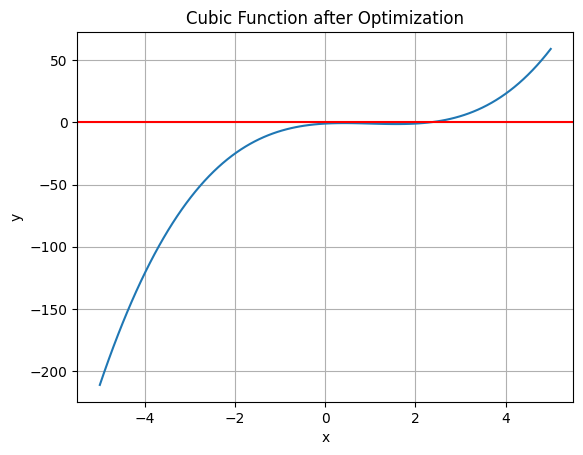

In [9]:
import matplotlib.pyplot as plt

x_vals = torch.linspace(-5, 5, 100)
y_vals = a*x_vals**3 + b*x_vals**2 + c*x_vals + d

plt.plot(x_vals.detach(), y_vals.detach())
plt.axhline(0, color='red')
plt.title("Cubic Function after Optimization")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


## Explanation

This notebook demonstrates solving a cubic equation using PyTorch.
Instead of symbolic math, the problem is treated as an optimization task.

- The variable `x` is initialized randomly and made trainable.
- The cubic equation is converted into a loss function.
- ReLU activation is applied to ensure non-negative loss.
- Stochastic Gradient Descent (SGD) is used to minimize the loss.
- After training, the optimized value of `x` approximates a root of the equation.
